In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fpath = "C:\\Users\\ys8mz\\Box Sync\\Predictive Models of College Completion (VCCS)\\evaluation_results\\"

In [2]:
m_dict = {'Logit': 'LR1', 'OLS': 'OLS',
          'RF': 'RF', 'XGBoost': 'XGBoost'}

#### Overlapping in Feature ranking: use for generating Figure 8 of the paper

In [213]:
r2_dict = {}
for k,v in m_dict.items():
    if v == 'LR1':
        r2_dict[k] = np.array(pd.read_csv(fpath+"truncated_predictors\\lr_feature_ranking.csv").iloc[:66,0])
    elif v == 'XGBoost':
        r2_dict[k] = np.array(pd.read_csv(fpath+"truncated_predictors\\xgb_summary.csv").iloc[:66,0])
    elif v == "RF":
        r2_dict[k] = np.array(pd.read_csv(fpath+"truncated_predictors\\{}_summary.csv".format(v)).iloc[:66,0])
    else:
        r2_dict[k] = np.array(pd.read_csv(fpath+"truncated_predictors\\{}_feature_ranking.csv".format(v)).iloc[:66,0])

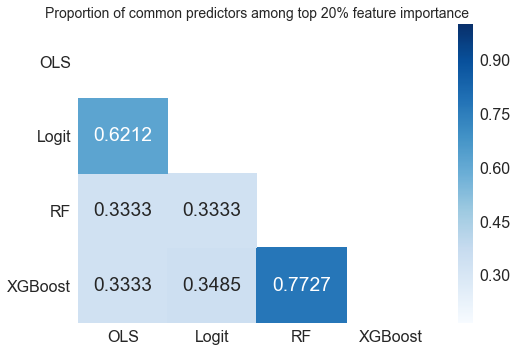

In [214]:
fi_corr = np.zeros((4,4))
for i1,m1 in enumerate(['OLS', 'Logit', 'RF', 'XGBoost']):
    for i2,m2 in enumerate(['OLS', 'Logit', 'RF', 'XGBoost']):
        fi_corr[i1,i2] = round(len(np.intersect1d(r2_dict[m1],r2_dict[m2]))/66,4)
fi_corr_df = pd.DataFrame(fi_corr, columns = ['OLS', 'Logit', 'RF', 'XGBoost'], index=['OLS', 'Logit', 'RF', 'XGBoost'])
vmin = np.nanmin(fi_corr_df.iloc[:,:].get_values())
vmax = np.nanmax(fi_corr_df.iloc[:,:].get_values())
l = vmax - vmin
mask = np.zeros_like(fi_corr_df)
mask[np.triu_indices_from(mask)] = True
g = sns.heatmap(fi_corr_df, mask=mask, annot=True, cmap='Blues',fmt='.4g',
                vmin=max(0,vmin-0.25*l),vmax=min(1,vmax+0.25*l))
g.set_yticklabels(g.get_yticklabels(), rotation=0, fontsize=16)
g.set_xticklabels(g.get_xticklabels(), fontsize=16)
g.set_facecolor("white")
plt.title("Proportion of common predictors among top 20% feature importance", fontsize=14)
plt.savefig(fpath+"truncated_predictors\\cleaned_results\\feature_ranking\\top_20pct_overlapping.png")
plt.show()